In [22]:
import psycopg2
import pandas as pd
import sh
from IPython.display import display, HTML, Javascript
from shapely import wkt
from geopandas import GeoDataFrame as gdf



parcels = psycopg2.connect('service=parcels')

In [23]:
df = gdf.from_postgis("""select p.*, r.risk_category as parcel_risk_category  from parcels p LEFT JOIN parcel_risk_category r ON p.parcel_id = r.parcel_id WHERE city='ONTARIO' AND state='CA'""", con=parcels, geom_col='wkb_geometry')
df

,ogc_fid,wkb_geometry,parcel_id,state_code,cnty_code,apn,apn2,addr,city,state,...,condition,constr_typ,ext_walls,quality,story_nbr,bld_units,units_nbr,risk_category,risk_data,parcel_risk_category
0,12736,"MULTIPOLYGON (((-117.66337 34.07470, -117.6632...",775172885.0,06,071,101016412,1010-164-12-0000,806 W I ST,ONTARIO,CA,...,AVE,FRM,None,001,1.0,2.0,NaN,None,None,Low
1,12737,"MULTIPOLYGON (((-117.66424 34.07470, -117.6640...",775172890.0,06,071,101016417,1010-164-17-0000,830 W I ST,ONTARIO,CA,...,AVE,FRM,STU,001,1.0,1.0,NaN,None,None,Low
2,12750,"MULTIPOLYGON (((-117.66327 34.07288, -117.6632...",775173443.0,06,071,101017212,1010-172-12-0000,810 W H ST,ONTARIO,CA,...,AVE,FRM,None,001,1.0,1.0,NaN,None,None,Low
3,12751,"MULTIPOLYGON (((-117.66366 34.07288, -117.6636...",775173445.0,06,071,101017214,1010-172-14-0000,822 W H ST,ONTARIO,CA,...,AVE,FRM,STU,001,1.0,1.0,NaN,None,None,Low
4,12777,"MULTIPOLYGON (((-117.67430 34.08202, -117.6742...",775174340.0,06,071,100871558,1008-715-58-0000,1352 W 5TH ST,ONTARIO,CA,...,AVE,FRM,None,001,1.0,1.0,199.0,None,None,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41057,762956,"MULTIPOLYGON (((-117.67471 34.04213, -117.6747...",775237459.0,06,071,101421122,1014-211-22-0000,None,ONTARIO,CA,...,None,None,None,None,NaN,NaN,NaN,high,"{'city': 'ONTARIO', 'geom': '0101000020E610000...",High
41058,389224,"MULTIPOLYGON (((-117.56721 34.01529, -117.5713...",774759353.0,06,071,021816106,0218-161-06-0000,3850 E RIVERSIDE DR,ONTARIO,CA,...,None,None,None,None,NaN,NaN,NaN,high,"{'city': 'ONTARIO', 'geom': '0101000020E610000...",High
41059,362953,"MULTIPOLYGON (((-117.61326 34.07942, -117.6132...",774725777.0,06,071,010856101,0108-561-01-0000,None,ONTARIO,CA,...,None,None,None,None,NaN,NaN,NaN,high,"{'city': 'ONTARIO', 'geom': '0101000020E610000...",High
41060,408450,"MULTIPOLYGON (((-117.64610 34.04654, -117.6481...",775280291.0,06,071,105008101,1050-081-01-0000,None,ONTARIO,CA,...,None,None,None,None,NaN,NaN,NaN,high,"{'city': 'ONTARIO', 'geom': '0101000020E610000...",High


In [24]:
df_2 = df.drop(['risk_category'], axis=1)
df_3 = df_2.rename(columns={'parcel_risk_category': 'risk_category'})
df_3

,ogc_fid,wkb_geometry,parcel_id,state_code,cnty_code,apn,apn2,addr,city,state,...,bld_imp_cd,condition,constr_typ,ext_walls,quality,story_nbr,bld_units,units_nbr,risk_data,risk_category
0,12736,"MULTIPOLYGON (((-117.66337 34.07470, -117.6632...",775172885.0,06,071,101016412,1010-164-12-0000,806 W I ST,ONTARIO,CA,...,None,AVE,FRM,None,001,1.0,2.0,NaN,None,Low
1,12737,"MULTIPOLYGON (((-117.66424 34.07470, -117.6640...",775172890.0,06,071,101016417,1010-164-17-0000,830 W I ST,ONTARIO,CA,...,None,AVE,FRM,STU,001,1.0,1.0,NaN,None,Low
2,12750,"MULTIPOLYGON (((-117.66327 34.07288, -117.6632...",775173443.0,06,071,101017212,1010-172-12-0000,810 W H ST,ONTARIO,CA,...,None,AVE,FRM,None,001,1.0,1.0,NaN,None,Low
3,12751,"MULTIPOLYGON (((-117.66366 34.07288, -117.6636...",775173445.0,06,071,101017214,1010-172-14-0000,822 W H ST,ONTARIO,CA,...,None,AVE,FRM,STU,001,1.0,1.0,NaN,None,Low
4,12777,"MULTIPOLYGON (((-117.67430 34.08202, -117.6742...",775174340.0,06,071,100871558,1008-715-58-0000,1352 W 5TH ST,ONTARIO,CA,...,None,AVE,FRM,None,001,1.0,1.0,199.0,None,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41057,762956,"MULTIPOLYGON (((-117.67471 34.04213, -117.6747...",775237459.0,06,071,101421122,1014-211-22-0000,None,ONTARIO,CA,...,None,None,None,None,None,NaN,NaN,NaN,"{'city': 'ONTARIO', 'geom': '0101000020E610000...",High
41058,389224,"MULTIPOLYGON (((-117.56721 34.01529, -117.5713...",774759353.0,06,071,021816106,0218-161-06-0000,3850 E RIVERSIDE DR,ONTARIO,CA,...,None,None,None,None,None,NaN,NaN,NaN,"{'city': 'ONTARIO', 'geom': '0101000020E610000...",High
41059,362953,"MULTIPOLYGON (((-117.61326 34.07942, -117.6132...",774725777.0,06,071,010856101,0108-561-01-0000,None,ONTARIO,CA,...,None,None,None,None,None,NaN,NaN,NaN,"{'city': 'ONTARIO', 'geom': '0101000020E610000...",High
41060,408450,"MULTIPOLYGON (((-117.64610 34.04654, -117.6481...",775280291.0,06,071,105008101,1050-081-01-0000,None,ONTARIO,CA,...,None,None,None,None,None,NaN,NaN,NaN,"{'city': 'ONTARIO', 'geom': '0101000020E610000...",High


<IPython.core.display.Javascript object>


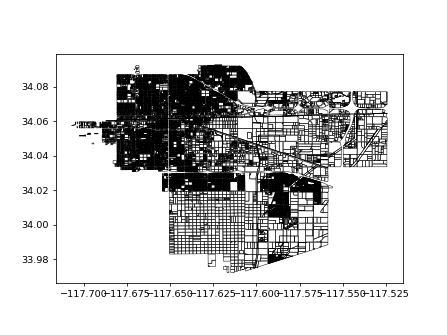

In [27]:
import matplotlib.pyplot as plt
import geopandas

%matplotlib notebook

fig, ax = plt.subplots(1, 1)

df_3.geometry.boundary.plot(color=None, edgecolor='k', linewidth=0.5, ax=ax)


plt.show()

In [26]:
df_3.to_file('parcel-risk.shp')